# Unsupervised Dimensionality Reduction
## Principal Component Analysis

In this notebook we will explore principal component analysis (PCA)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.3.0


In [52]:
#mnist = keras.datasets.mnist   #The original handwritten digit MNIST
mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images=train_images/255.0

print(np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print(np.shape(X))
x=X-np.average(X,axis=0)
rho=np.dot(np.transpose(x),x)
vals,vecs=linalg.eig(rho)

(60000, 28, 28)
(60000, 784)


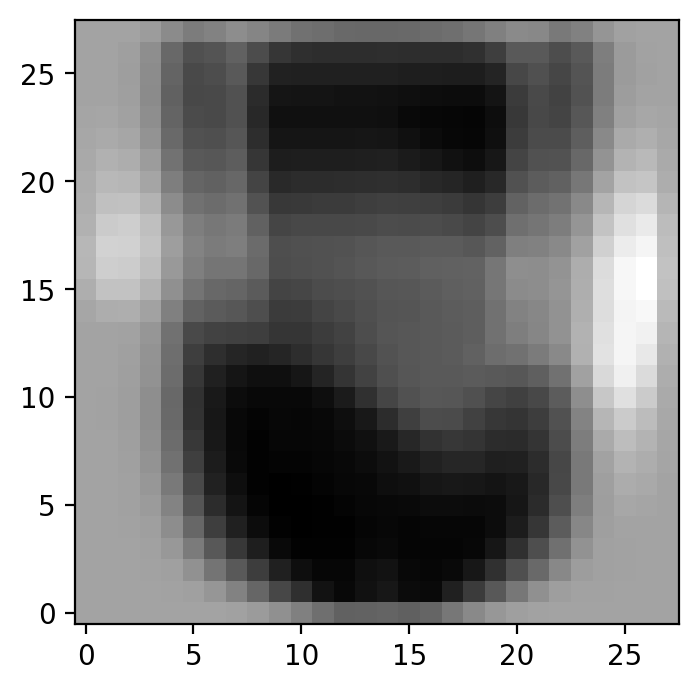

In [53]:
fig,ax=plt.subplots()
ax.imshow(np.reshape(vecs[:,0].real,[28,28]), origin='lower',cmap='binary',interpolation='nearest')

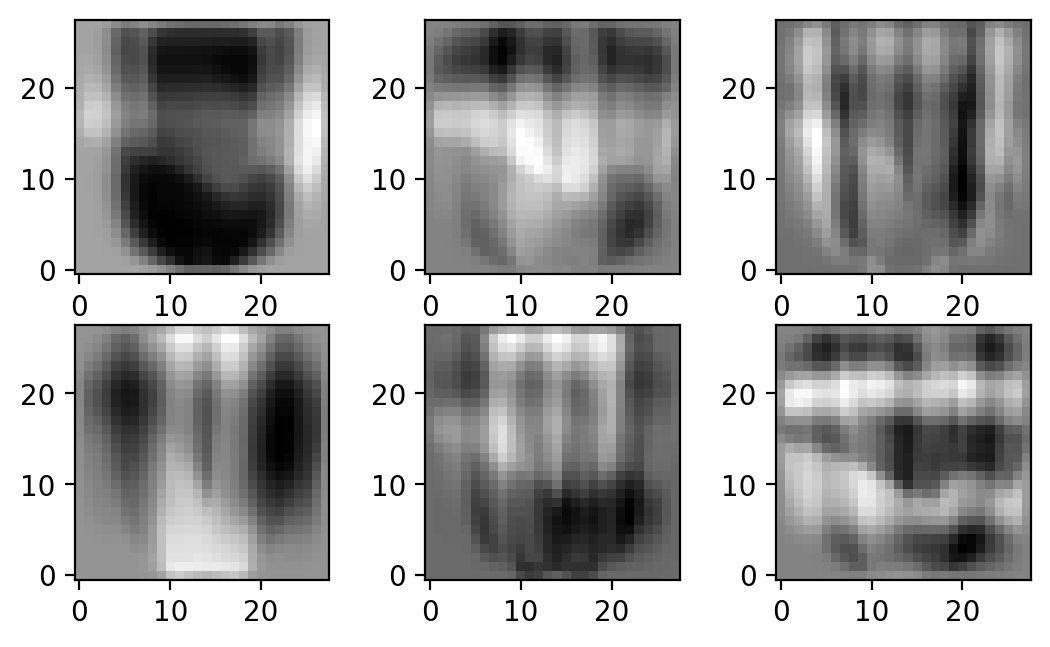

In [54]:
fig,ax=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(np.reshape(vecs[:,i+j*3].real,[28,28]), origin='lower',cmap='binary',interpolation='nearest')
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)  #Adjust the space between the subplots so there isn't acres of whitespace

(784,)


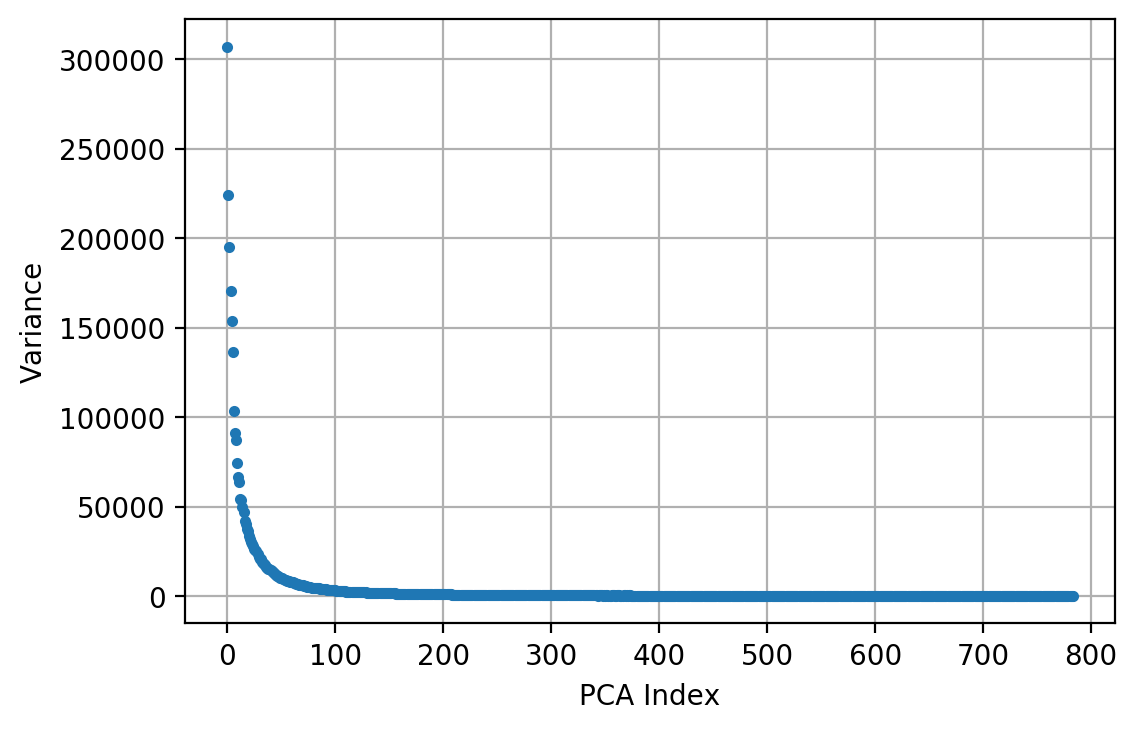

In [48]:
print(np.shape(vals))
fig,ax=plt.subplots()
index=np.arange((np.shape(vals)[0]))
ax.plot(index,vals.real,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Variance")
ax.grid()

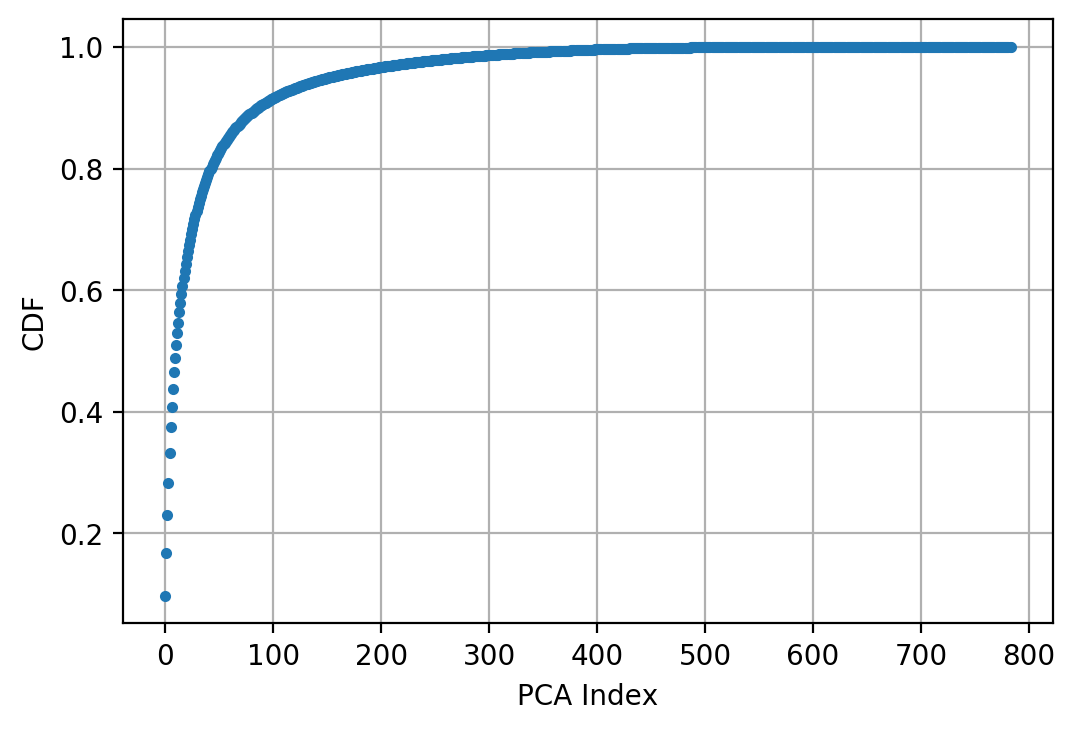

In [47]:
fig,ax=plt.subplots()
cumsum=np.cumsum(vals.real)
cdf=cumsum/cumsum[-1]
index=np.arange((np.shape(vals)[0]))
ax.plot(index,cdf,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("CDF")
ax.grid()